In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
couleurs = ['#97C1A9', '#FFFFFF']
import matplotlib.pyplot as plt
import os
from datetime import datetime

In [2]:
pd.options.display.float_format = '{:.2f}'.format

In [3]:
directory = r'D:\RECONCILIATIONS\TRANSFERT\MTN CM\Données OP\SEPT'

# Je recupère le fichier CSV le plus récent dans mon repertoire scpécifier
def get_latest_file(directory):
    files = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.csv')]
    latest_file = max(files, key=os.path.getctime)
    return latest_file

# Je Charge le fichier CSV le plus récent
latest_file_path = get_latest_file(directory)
mtn = pd.read_csv(latest_file_path)
mtn.sample()



directory = r'D:\RECONCILIATIONS\TRANSFERT\MTN CM\Données PMT\SEPT'

# Je recupère le fichier CSV le plus récent dans mon repertoire scpécifier
def get_latest_file(directory):
    files = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.csv')]
    latest_file = max(files, key=os.path.getctime)
    return latest_file

# Je Charge le fichier CSV le plus récent
latest_file_path = get_latest_file(directory)
pmt = pd.read_csv(latest_file_path)
pmt.sample()

,Created Date,Payment Date,Operator,Merchant Name,Identifiant,Transaction ID,Merchant transaction ID,ID Opérateur,ID de transaction externe,Numéro de téléphone,...,Merchant amount,Devise,Opération,Statut,Provider ID,Provider Name,Pays,Provider Status,Origin before check,Origin after check
14819,2024-09-11 16:42:20,NaN,MTN_CM,1XBET CM,NaN,20dbded6-498e-4bd6-bf87-4ead42d56578,2742427579,9963564590.00,NaN,237672398215,...,"1560,00",XAF,Transfer,succès,20dbded6-498e-4bd6-bf87-4ead42d56578,MTN CM Payout Direct,CM,succès,"{""cookies"":{},""transferStats"":{}}","{""amount"":""1500"",""currency"":""XAF"",""financialTr..."


In [4]:
#mtn = pd.read_csv(r'D:\RECONCILIATIONS\TRANSFERT\MTN CM\Données OP\JUIN\20240701-MTN CM-PAYOUT-20240601-20240630.csv')

In [5]:
#pmt = pd.read_csv(r'D:\RECONCILIATIONS\TRANSFERT\MTN CM\Données PMT\JUIN\20240701_PAYOUT_PMT_MTN_CM_20240601-20240630.csv')

In [6]:
mtn1=mtn.copy()
pmt1=pmt.copy()

In [7]:
dfmtn=mtn[['Id',
           'External id',
           'Date',
           'Status',
           'Type',
           'Amount',
           'Currency.14',
           'From name'
]]

In [8]:
"""
dfpmt = pmt.rename(columns={
        'created_at': 'Created Date',
        'payment_date': 'Payment Date',
        'operator': 'Operator',
        'merchant_name': 'Merchant Name',
        'transaction_id': 'Transaction ID',
        'id_operator': 'ID Opérateur',
        'phone_number': 'Phone Number',
        'amount': 'Montant',
        'fee_amount': 'Fee amount',
        'merchant_amount': 'Merchant amount',
        'statut': 'Statut'
    })
"""

dfpmt1=pmt[['Created Date',
         'Payment Date',
         'Operator',
         'Merchant Name',
         'Transaction ID',
         'ID Opérateur',
         'Numéro de téléphone',
         'Montant',
         'Fee amount',
         'Merchant amount',
         'Statut'
]]

In [9]:
#dfmtn['Externalid'] = dfmtn['External id'].str.replace('-', '')

In [10]:
#CONVERTIR LA DATE EN DATETIME

#EXTRAITRE LA DATE DANS UNE NOUVELLE COLLONNE
dfpmt1['DateCourte'] = dfpmt1['Created Date'].apply(lambda x: x.split(' ')[0])

In [11]:
# Convertir les valeurs en chaînes de caractères et gérer les valeurs manquantes
dfmtn['Date'] = dfmtn['Date'].astype(str)

# Extraire la date dans une nouvelle colonne en utilisant une condition pour éviter les erreurs sur les NaN ou float
dfmtn['DateCourte'] = dfmtn['Date'].apply(lambda x: x.split(' ')[0] if ' ' in x else x)


In [12]:
dfpmt1.sample(6)

,Created Date,Payment Date,Operator,Merchant Name,Transaction ID,ID Opérateur,Numéro de téléphone,Montant,Fee amount,Merchant amount,Statut,DateCourte
6182,2024-09-14 11:11:55,NaN,MTN_CM,1XBET CM,f0fb09be-9c53-4f2a-a2a9-f806ee1438f5,9986179108.00,237671889235,"2500,00","100,00","2600,00",succès,2024-09-14
7450,2024-09-14 00:10:22,NaN,MTN_CM,1XBET CM,7a944728-fa95-4a37-b532-8e87c386c3ae,9983028196.00,237653516019,"1000,00","40,00","1040,00",succès,2024-09-14
10246,2024-09-13 07:25:09,NaN,MTN_CM,1XBET CM,aed54596-eab0-41b9-8049-7ef5e6a5c962,9975557062.00,237651267640,"2000,00","80,00","2080,00",succès,2024-09-13
23021,2024-09-09 11:49:00,NaN,MTN_CM,BetWinner CM,293f76f2-b1c5-4be1-bc76-2c8034ee397f,9943898890.00,237672872158,"1500,00","30,00","1530,00",succès,2024-09-09
6029,2024-09-14 11:32:57,NaN,MTN_CM,1XBET CM,97f145d4-a09a-41f2-8c6a-7af86232539e,9986377218.00,237672023764,"6500,00","260,00","6760,00",succès,2024-09-14
18647,2024-09-10 13:56:24,NaN,MTN_CM,1XBET CM,3f63a0d9-1532-40fc-9a3e-042f1578b32f,9953666966.00,237671720443,"1000,00","40,00","1040,00",succès,2024-09-10


In [13]:
dfpmt1['Statut'].unique()

array(['succès', 'échec'], dtype=object)

In [14]:
dfmtn.head(2)

,Id,External id,Date,Status,Type,Amount,Currency.14,From name,DateCourte
0,10003497311,3bff0ac6-9ac7-409d-8c6e-cd8ff2d0cf22,2024-09-16 10:13:21,Successful,Transfer,-10000,XAF,PAYMETRUST Deposit,2024-09-16
1,10003496779,5d55de6e-0d3e-4444-b999-127526380bbb,2024-09-16 10:13:18,Successful,Transfer,-15000,XAF,PAYMETRUST Deposit,2024-09-16


In [15]:
dfmtn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23438 entries, 0 to 23437
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           23438 non-null  int64 
 1   External id  23433 non-null  object
 2   Date         23438 non-null  object
 3   Status       23438 non-null  object
 4   Type         23438 non-null  object
 5   Amount       23438 non-null  int64 
 6   Currency.14  23438 non-null  object
 7   From name    23438 non-null  object
 8   DateCourte   23438 non-null  object
dtypes: int64(2), object(7)
memory usage: 1.6+ MB


In [16]:
dfpmt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27214 entries, 0 to 27213
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Created Date         27214 non-null  object 
 1   Payment Date         0 non-null      float64
 2   Operator             27214 non-null  object 
 3   Merchant Name        27214 non-null  object 
 4   Transaction ID       27214 non-null  object 
 5   ID Opérateur         26203 non-null  float64
 6   Numéro de téléphone  27214 non-null  int64  
 7   Montant              27214 non-null  object 
 8   Fee amount           27214 non-null  object 
 9   Merchant amount      27214 non-null  object 
 10  Statut               27214 non-null  object 
 11  DateCourte           27214 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 2.5+ MB


In [17]:
dfmtn['External id'].isnull().sum()

5

In [18]:
dfmtn = dfmtn.drop_duplicates(subset=['External id'])

In [19]:
dfmtn['External id'].isnull().sum()

1

In [20]:
dfpmt1['Transaction ID'].isnull().sum()

0

In [21]:
correspondance_statut_op= dfmtn.set_index('External id')['Status']
correspondance_date_op = dfmtn.set_index('External id')['DateCourte']
correspondance_idoperator = dfmtn.set_index('External id')['Id']


dfpmt1['DATEOP'] = dfpmt1['Transaction ID'].map(correspondance_date_op)
dfpmt1['STATUTOP'] = dfpmt1['Transaction ID'].map(correspondance_statut_op)
dfpmt1['IDOPERATOR'] = dfpmt1['Transaction ID'].map(correspondance_idoperator)

In [22]:
dfpmt1['Montant']= dfpmt1['Montant'].str.replace(',','.').astype(float)
dfpmt1['Fee amount']= dfpmt1['Fee amount'].str.replace(',','.').astype(float)

In [23]:
dfpmt1['Fraisop'] = dfpmt1['Montant'] * 0.001
dfpmt1['FraisPmt'] = dfpmt1['Fee amount'] - dfpmt1['Fraisop']

In [24]:
dfpmt1['Fraisop'] = dfpmt1['Montant'] * 0.001
dfpmt1['FraisPmt'] = dfpmt1['Fee amount'] - dfpmt1['Fraisop']

In [25]:
dfmtn['Type'].unique()

array(['Transfer', 'Adjustment'], dtype=object)

In [26]:
transfert= dfmtn.loc[(dfmtn['Type'] == 'Transfer') & (dfmtn['From name'] == 'PAYMETRUST Deposit')]

NBSI PMT ET MTNCM

In [27]:
#NBSI PMT &OMBF
dfpmt1['MTN'] = dfpmt1['Transaction ID'].isin(transfert['External id']).astype(int)
transfert['PMT'] = transfert['External id'].isin(dfpmt1['Transaction ID']).astype(int)

In [28]:
#NBSI PMT &OMBF
dfpmt1['MTN'] = dfpmt1['Transaction ID'].isin(transfert['External id']).astype(int)
transfert['PMT'] = transfert['External id'].isin(dfpmt1['Transaction ID']).astype(int)

In [29]:
dfpmt1['Nombre']= dfpmt1['Montant']
transfert['Nombre']= transfert['Amount']

TABLEAU CROISE DYNAMIQUE PMT ET MTNCM

In [30]:
df_filtered = dfpmt1[dfpmt1['MTN'] == 1]

# Création du tableau croisé dynamique
tcdpmt = pd.pivot_table(
    df_filtered,
    values=['Montant', 'Nombre','Fraisop', 'FraisPmt'],
    index=['DATEOP','Statut'],
    aggfunc={'Nombre': 'count','Montant': 'sum' ,'Fraisop': 'sum', 'FraisPmt': 'sum' },
    fill_value=0,
    margins=True,
    margins_name='Total'
)

df_filtered = transfert[(transfert['PMT'] == 1) | (transfert['PMT'] == 0)]

# Création du tableau croisé dynamique
tcdmtn = pd.pivot_table(
    df_filtered,
    values=['Nombre', 'Amount'],
    index=['DateCourte','Status'],
    aggfunc={'Nombre': 'count','Amount': 'sum' },
    fill_value=0,
    margins=True,
    margins_name='Total'
)

In [31]:
tcdpmt

FraisPmt   Fraisop      Montant  Nombre
DATEOP     Statut                                           
2024-09-09 succès  1618049.96  44226.14  44226139.00    3152
           échec       117.00      3.00      3000.00       1
2024-09-10 succès  2654230.27  70921.66  70921665.00    4212
2024-09-11 succès  1335488.96  35994.96  35994965.00    2804
2024-09-12 succès  1238201.67  37877.31  37877310.00    3139
2024-09-13 succès  1345844.90  37965.40  37965396.00    3025
2024-09-14 succès  2527817.74  71229.90  71229899.00    3943
2024-09-15 succès  1432912.43  40110.21  40110212.00    2032
2024-09-16 succès   624976.57  16796.29  16796293.00     827
Total             12777639.50 355124.88 355124879.00   23135

In [32]:
tcdmtn

,,Amount,Nombre
DateCourte,Status,,
2024-09-09,Successful,-44229139,3153
2024-09-10,Successful,-70921665,4212
2024-09-11,Successful,-35994965,2804
2024-09-12,Successful,-37877310,3139
2024-09-13,Successful,-37965396,3025
2024-09-14,Successful,-71229899,3943
2024-09-15,Successful,-40110212,2032
2024-09-16,Successful,-21187734,1124
Total,,-359516320,23432


TRANSACTION A METTRE A SUCCES

In [33]:
maj_pending = dfpmt1.loc[(dfpmt1['Statut'] == 'en attente') & (dfpmt1['MTN'] == 1)]

In [34]:
maj_pending

,Created Date,Payment Date,Operator,Merchant Name,Transaction ID,ID Opérateur,Numéro de téléphone,Montant,Fee amount,Merchant amount,Statut,DateCourte,DATEOP,STATUTOP,IDOPERATOR,Fraisop,FraisPmt,MTN,Nombre


TRANSACTION SUCCES CHEZ MTN A RECHERCEHR

In [35]:
trx_succes_a_rechercher = transfert.loc[(transfert['PMT'] == 0)]
trx_succes_a_rechercher

,Id,External id,Date,Status,Type,Amount,Currency.14,From name,DateCourte,PMT,Nombre
0,10003497311,3bff0ac6-9ac7-409d-8c6e-cd8ff2d0cf22,2024-09-16 10:13:21,Successful,Transfer,-10000,XAF,PAYMETRUST Deposit,2024-09-16,0,-10000
1,10003496779,5d55de6e-0d3e-4444-b999-127526380bbb,2024-09-16 10:13:18,Successful,Transfer,-15000,XAF,PAYMETRUST Deposit,2024-09-16,0,-15000
2,10003496274,a59e904e-5f9b-4057-81a1-4c557135fe2f,2024-09-16 10:13:15,Successful,Transfer,-5500,XAF,PAYMETRUST Deposit,2024-09-16,0,-5500
3,10003495818,c7a3630c-e2cf-43f9-9298-0c46fbb638a6,2024-09-16 10:13:11,Successful,Transfer,-3000,XAF,PAYMETRUST Deposit,2024-09-16,0,-3000
4,10003495345,0c8e35ce-5a02-49d5-bfd0-e38fca3c48a0,2024-09-16 10:13:08,Successful,Transfer,-33000,XAF,PAYMETRUST Deposit,2024-09-16,0,-33000
...,...,...,...,...,...,...,...,...,...,...,...
293,10002464930,91995aee-c7f8-4b6f-975e-03a76f1b5f51,2024-09-16 08:11:18,Successful,Transfer,-1550,XAF,PAYMETRUST Deposit,2024-09-16,0,-1550
294,10002464893,59dabc1e-fbec-43a4-b948-92cb85b24120,2024-09-16 08:11:17,Successful,Transfer,-70000,XAF,PAYMETRUST Deposit,2024-09-16,0,-70000
295,10002464376,815a4653-f963-408b-9c8a-3fb796a7bc47,2024-09-16 08:11:14,Successful,Transfer,-5000,XAF,PAYMETRUST Deposit,2024-09-16,0,-5000
296,10002463908,d3e9e798-76be-41c8-83fa-3679e1c359ad,2024-09-16 08:11:10,Successful,Transfer,-2000,XAF,PAYMETRUST Deposit,2024-09-16,0,-2000


TRANSACTION SUCCES PMT ABSENT MTNCM

In [36]:
trx_succes_abs_mtn = dfpmt1.loc[(dfpmt1['MTN'] == 0) & (dfpmt1['Statut'] == 'SUCCESS')]
trx_succes_abs_mtn

,Created Date,Payment Date,Operator,Merchant Name,Transaction ID,ID Opérateur,Numéro de téléphone,Montant,Fee amount,Merchant amount,Statut,DateCourte,DATEOP,STATUTOP,IDOPERATOR,Fraisop,FraisPmt,MTN,Nombre


TRANSACTION EN ATTENTE PMT ABSENTE MTNCM

In [37]:
trx_pending_abs_mtn = dfpmt1.loc[(dfpmt1['MTN'] == 0) & (dfpmt1['Statut'] == 'en attente')]
trx_pending_abs_mtn.shape

(0, 19)

In [38]:
trx_pending_abs_mtn

,Created Date,Payment Date,Operator,Merchant Name,Transaction ID,ID Opérateur,Numéro de téléphone,Montant,Fee amount,Merchant amount,Statut,DateCourte,DATEOP,STATUTOP,IDOPERATOR,Fraisop,FraisPmt,MTN,Nombre


In [39]:
perte_syst = dfpmt1.loc[(dfpmt1['MTN'] == 1) & (dfpmt1['Statut'] == 'échec')]
perte_syst

,Created Date,Payment Date,Operator,Merchant Name,Transaction ID,ID Opérateur,Numéro de téléphone,Montant,Fee amount,Merchant amount,Statut,DateCourte,DATEOP,STATUTOP,IDOPERATOR,Fraisop,FraisPmt,MTN,Nombre
23372,2024-09-09 08:41:32,NaN,MTN_CM,1XBET CM,23898fe4-4981-49da-ad04-b4ebf672cb62,NaN,237679415537,3000.00,120.00,"3120,00",échec,2024-09-09,2024-09-09,Successful,9942195497.00,3.00,117.00,1,3000.00


In [40]:
# Enregistrer les données filtrées dans un fichier Excel

# Enregistrer les données filtrées dans un fichier Excel

#output_file_path = 'D:/RECO/OMSN/PAYIN/MAJ/trx_a_mettre_ajour.xlsx'
#maj.to_excel(output_file_path, index=False)

#print(f"Fichier enregistré sous : {output_file_path}")


CREATION DU FICHIER D'ANALYSE

In [41]:
report_date = "20240909_20240915"
# Générer automatiquement le chemin de sortie avec la date actuelle
current_date = datetime.now().strftime("%Y%m%d_%H%M%S")
output_dir = 'D:/RECO/MTNCM/PAYOUT/RECAPANALYSE/SEPT'
output_file_name = f"{current_date}_RAPPORT_ANALYSE_{report_date}.xlsx"
output_file_path = os.path.join(output_dir, output_file_name)

# Création de DataFrames d'exemple
data_pmt = dfpmt1
data_op = dfmtn
pertes = perte_syst
maj_jour_pending = maj_pending
trxenattente_abs = trx_pending_abs_mtn
trx_succs_mtn_abs_pmt=trx_succes_a_rechercher

# Dictionnaire de DataFramess
feuilles = {
    'DATA PMT': data_pmt,
    'data op': data_op,
    'pertes_syst': pertes,
    'maj_pending': maj_jour_pending,
    'trxenattente_abs': trxenattente_abs,
    'trx_succes_mtn_abs_pmt':trx_succs_mtn_abs_pmt
}

# Affichage du nombre de lignes pour chaque DataFrame
for nom_feuille, df in feuilles.items():
    print(f"Feuille: {nom_feuille} - Nombre de lignes: {len(df)}")

# Création de l'objet ExcelWriter
with pd.ExcelWriter(output_file_path, engine='openpyxl') as writer:
    for nom_feuille, df in feuilles.items():
        df.to_excel(writer, sheet_name=f"{nom_feuille} ({len(df)} lignes)", index=False)

print(f"Fichier Excel avec plusieurs feuilles sauvegardé avec succès: {output_file_path}")

Feuille: DATA PMT - Nombre de lignes: 27214
Feuille: data op - Nombre de lignes: 23434
Feuille: pertes_syst - Nombre de lignes: 1
Feuille: maj_pending - Nombre de lignes: 0
Feuille: trxenattente_abs - Nombre de lignes: 0
Feuille: trx_succes_mtn_abs_pmt - Nombre de lignes: 297
Fichier Excel avec plusieurs feuilles sauvegardé avec succès: D:/RECO/MTNCM/PAYOUT/RECAPANALYSE/SEPT\20240916_102637_RAPPORT_ANALYSE_20240909_20240915.xlsx


In [42]:
select_statut= dfpmt1['Statut'].value_counts()
select_statut

Statut
succès    26203
échec      1011
Name: count, dtype: int64

In [43]:
succes= dfpmt1[(dfpmt1['Statut'] == 'succès')]
echec =dfpmt1[(dfpmt1['Statut'] == 'échec')]

In [44]:
success=succes[['Created Date',
           'Payment Date',
           'Operator',
           'Merchant Name',
           'Transaction ID',
           'Numéro de téléphone',
           'DateCourte',
           'DATEOP',
           'Statut',
           'STATUTOP',
           'Montant'
]]
success.head(2)

,Created Date,Payment Date,Operator,Merchant Name,Transaction ID,Numéro de téléphone,DateCourte,DATEOP,Statut,STATUTOP,Montant
0,2024-09-16 08:09:52,NaN,MTN_CM,BetWinner CM,e995aff6-084a-4228-a1a6-f834a8fe1d93,237654411821,2024-09-16,2024-09-16,succès,Successful,12000.00
1,2024-09-16 08:02:46,NaN,MTN_CM,BetWinner CM,2ddf8dcc-291f-4bf2-843d-6b259961b5f3,237674687078,2024-09-16,2024-09-16,succès,Successful,10000.00


In [45]:
echecs=echec[['Created Date',
           'Payment Date',
           'Operator',
           'Merchant Name',
           'Transaction ID',
           'Numéro de téléphone',
           'DateCourte',
           'DATEOP',
           'Statut',
           'STATUTOP',
           'Montant'
]]
echecs.head(2)

,Created Date,Payment Date,Operator,Merchant Name,Transaction ID,Numéro de téléphone,DateCourte,DATEOP,Statut,STATUTOP,Montant
109,2024-09-16 07:11:00,NaN,MTN_CM,1XBET CM,90bff329-e928-44a0-a30d-4814cd928ca2,237688050355,2024-09-16,NaN,échec,NaN,5000.00
114,2024-09-16 07:01:25,NaN,MTN_CM,BetWinner CM,86369a64-93f2-47ea-92f3-a87fb01939d3,237699789959,2024-09-16,NaN,échec,NaN,900.00


In [46]:
select_success_min = success.groupby(['DateCourte','STATUTOP'])['Montant'].min()
select_success_min.reset_index()

,DateCourte,STATUTOP,Montant
0,2024-09-09,Successful,500.00
1,2024-09-10,Successful,500.00
2,2024-09-11,Successful,500.00
3,2024-09-12,Successful,500.00
4,2024-09-13,Successful,500.00
5,2024-09-14,Successful,500.00
6,2024-09-15,Successful,500.00
7,2024-09-16,Successful,500.00


In [47]:
select_success_max = success.groupby(['DateCourte','STATUTOP'])['Montant'].max()
select_success_max.reset_index()

,DateCourte,STATUTOP,Montant
0,2024-09-09,Successful,1000000.00
1,2024-09-10,Successful,1200000.00
2,2024-09-11,Successful,1000000.00
3,2024-09-12,Successful,850000.00
4,2024-09-13,Successful,760000.00
5,2024-09-14,Successful,887753.00
6,2024-09-15,Successful,950000.00
7,2024-09-16,Successful,750000.00


In [48]:
select_echec_min = echecs.groupby('DateCourte')['Montant'].min()
select_echec_min.reset_index()

,DateCourte,Montant
0,2024-09-08,1000.00
1,2024-09-09,1000.00
2,2024-09-10,1315.00
3,2024-09-11,900.00
4,2024-09-12,500.00
5,2024-09-13,500.00
6,2024-09-14,500.00
7,2024-09-15,500.00
8,2024-09-16,900.00


In [49]:
select_echec_max = echecs.groupby('DateCourte')['Montant'].max()
select_echec_max.reset_index()

,DateCourte,Montant
0,2024-09-08,29000.00
1,2024-09-09,25250.00
2,2024-09-10,182000.00
3,2024-09-11,1000000.00
4,2024-09-12,10000.00
5,2024-09-13,40000.00
6,2024-09-14,16000.00
7,2024-09-15,500900.00
8,2024-09-16,5000.00


ANALYSE MTNCM

In [50]:
dfmtn['Type'].unique()

array(['Transfer', 'Adjustment'], dtype=object)

In [51]:
dfpmt1['Statut'].unique()

array(['succès', 'échec'], dtype=object)

In [52]:
reversal= dfmtn.loc[(dfmtn['Type'] == 'Reversal')]
reversal

,Id,External id,Date,Status,Type,Amount,Currency.14,From name,DateCourte


In [53]:
adjustement= dfmtn.loc[(dfmtn['Type'] == 'Adjustment')]
adjustement

,Id,External id,Date,Status,Type,Amount,Currency.14,From name,DateCourte
18892,9950985504,39,2024-09-10 08:25:42,Successful,Adjustment,-7213754,XAF,PAYMETRUST Deposit,2024-09-10


In [54]:
rechargemnt_payin_vers_payout = dfmtn.loc[(dfmtn['From name'] == 'PAYMETRUST Payment')]
rechargemnt_payin_vers_payout

,Id,External id,Date,Status,Type,Amount,Currency.14,From name,DateCourte
264,10002523749,NaN,2024-09-16 08:18:19,Successful,Transfer,30000000,XAF,PAYMETRUST Payment,2024-09-16


ANALYSE PMT

In [55]:
dfpmt1.head(3)

,Created Date,Payment Date,Operator,Merchant Name,Transaction ID,ID Opérateur,Numéro de téléphone,Montant,Fee amount,Merchant amount,Statut,DateCourte,DATEOP,STATUTOP,IDOPERATOR,Fraisop,FraisPmt,MTN,Nombre
0,2024-09-16 08:09:52,NaN,MTN_CM,BetWinner CM,e995aff6-084a-4228-a1a6-f834a8fe1d93,10002453713.00,237654411821,12000.00,240.00,"12240,00",succès,2024-09-16,2024-09-16,Successful,10002453713.00,12.00,228.00,1,12000.00
1,2024-09-16 08:02:46,NaN,MTN_CM,BetWinner CM,2ddf8dcc-291f-4bf2-843d-6b259961b5f3,10002395863.00,237674687078,10000.00,200.00,"10200,00",succès,2024-09-16,2024-09-16,Successful,10002395863.00,10.00,190.00,1,10000.00
2,2024-09-16 08:01:17,NaN,MTN_CM,BetWinner CM,49c49d9e-c4a7-4458-83eb-faa7104e0fe5,10002383500.00,237674105122,30000.00,600.00,"30600,00",succès,2024-09-16,2024-09-16,Successful,10002383500.00,30.00,570.00,1,30000.00


In [56]:
select_statut_marchd=pd.crosstab(dfpmt1['Statut'],dfpmt1['Merchant Name']).reset_index()
select_statut_marchd

Merchant Name,Statut,1XBET CM,BetWinner CM,PMT Refund Merchant CM
0,succès,21570,4588,45
1,échec,776,235,0


In [57]:
select_montant_marchd = dfpmt1.groupby(['Merchant Name','DateCourte'])['Montant'].sum().reset_index()
select_montant_marchd

,Merchant Name,DateCourte,Montant
0,1XBET CM,2024-09-08,37752873.00
1,1XBET CM,2024-09-09,38906646.00
2,1XBET CM,2024-09-10,65346447.00
3,1XBET CM,2024-09-11,41794986.00
4,1XBET CM,2024-09-12,25936139.00
5,1XBET CM,2024-09-13,31226619.00
6,1XBET CM,2024-09-14,59085942.00
7,1XBET CM,2024-09-15,48149204.00
8,1XBET CM,2024-09-16,15301350.00
9,BetWinner CM,2024-09-08,4328414.00


In [58]:
uba= dfpmt1.loc[(dfpmt1['Merchant Name'] == 'Demo UBA Cameroun 1')]
uba

,Created Date,Payment Date,Operator,Merchant Name,Transaction ID,ID Opérateur,Numéro de téléphone,Montant,Fee amount,Merchant amount,Statut,DateCourte,DATEOP,STATUTOP,IDOPERATOR,Fraisop,FraisPmt,MTN,Nombre


In [59]:
liste_remb = dfpmt1.loc[(dfpmt1['Merchant Name'] == 'PMT Refund Merchant CM')]
liste_remb

,Created Date,Payment Date,Operator,Merchant Name,Transaction ID,ID Opérateur,Numéro de téléphone,Montant,Fee amount,Merchant amount,Statut,DateCourte,DATEOP,STATUTOP,IDOPERATOR,Fraisop,FraisPmt,MTN,Nombre
6050,2024-09-14 11:31:45,NaN,MTN_CM,PMT Refund Merchant CM,eee9c845-b03b-4a59-95ed-ade2ccfe9ef4,9986366138.00,237650940576,2000.00,0.00,"2000,00",succès,2024-09-14,2024-09-14,Successful,9986366138.00,2.00,-2.00,1,2000.00
6051,2024-09-14 11:31:45,NaN,MTN_CM,PMT Refund Merchant CM,3db04709-edcb-4efb-b54a-4ce8ed5ba255,9986365974.00,237651261415,10000.00,0.00,"10000,00",succès,2024-09-14,2024-09-14,Successful,9986365974.00,10.00,-10.00,1,10000.00
6052,2024-09-14 11:31:44,NaN,MTN_CM,PMT Refund Merchant CM,29826962-9943-4a46-a4a4-2a55d7f11132,9986365826.00,237651346822,3000.00,0.00,"3000,00",succès,2024-09-14,2024-09-14,Successful,9986365826.00,3.00,-3.00,1,3000.00
6054,2024-09-14 11:31:43,NaN,MTN_CM,PMT Refund Merchant CM,0bfde020-317e-49a2-8f83-d4a28426fe31,9986365699.00,237652369319,500.00,0.00,"500,00",succès,2024-09-14,2024-09-14,Successful,9986365699.00,0.50,-0.50,1,500.00
6055,2024-09-14 11:31:42,NaN,MTN_CM,PMT Refund Merchant CM,af78e3e2-3c39-412e-88f1-2d7661959dec,9986365585.00,237652584740,500.00,0.00,"500,00",succès,2024-09-14,2024-09-14,Successful,9986365585.00,0.50,-0.50,1,500.00
6056,2024-09-14 11:31:41,NaN,MTN_CM,PMT Refund Merchant CM,9ac87f4a-3046-4a3a-a601-57b217c14258,9986365465.00,237653145033,1000.00,0.00,"1000,00",succès,2024-09-14,2024-09-14,Successful,9986365465.00,1.00,-1.00,1,1000.00
6057,2024-09-14 11:31:41,NaN,MTN_CM,PMT Refund Merchant CM,a6ceee70-1b81-4eb8-b5d5-6c4e83620b0f,9986365332.00,237653291187,1000.00,0.00,"1000,00",succès,2024-09-14,2024-09-14,Successful,9986365332.00,1.00,-1.00,1,1000.00
6059,2024-09-14 11:31:40,NaN,MTN_CM,PMT Refund Merchant CM,967937a4-2d0c-43b3-acba-4759a1d88784,9986365177.00,237653438110,500.00,0.00,"500,00",succès,2024-09-14,2024-09-14,Successful,9986365177.00,0.50,-0.50,1,500.00
6060,2024-09-14 11:31:39,NaN,MTN_CM,PMT Refund Merchant CM,02c8d95b-76ca-47da-b4c6-633c11ba24f9,9986365050.00,237653439258,751.00,0.00,"751,00",succès,2024-09-14,2024-09-14,Successful,9986365050.00,0.75,-0.75,1,751.00
6061,2024-09-14 11:31:38,NaN,MTN_CM,PMT Refund Merchant CM,57eb1cfe-9246-4255-9878-f93d673b203c,9986364900.00,237654324618,1500.00,0.00,"1500,00",succès,2024-09-14,2024-09-14,Successful,9986364900.00,1.50,-1.50,1,1500.00


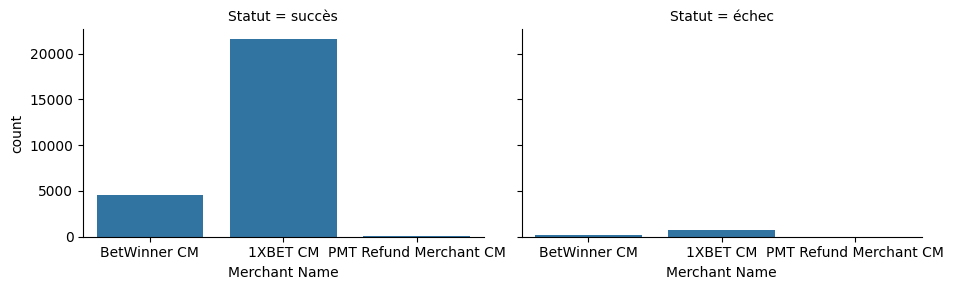

In [60]:
grid=sns.FacetGrid(dfpmt1, col='Statut', aspect=1.6)
grid.map(sns.countplot,'Merchant Name')

In [61]:
check_numero = dfpmt1.groupby(['Numéro de téléphone','Statut']).agg(
    Nombre=('Montant', 'count'),
    Volume=('Montant', 'sum')
)
check_numero

,,Nombre,Volume
Numéro de téléphone,Statut,,
237650000016,succès,2,50900.00
237650000112,succès,2,8000.00
237650001492,succès,1,40000.00
237650004060,succès,2,40000.00
237650004264,succès,2,530000.00
...,...,...,...
237699154080,échec,1,2000.00
237699192381,échec,1,500.00
237699196742,échec,1,2000.00


In [62]:
check_numero.Nombre.unique()

array([ 2,  1,  3,  5,  4,  7, 10,  6,  9,  8, 12, 16, 18, 28, 20, 14, 19,
       11, 13, 15, 22, 24, 21, 45, 30, 36, 17, 35, 48, 27], dtype=int64)

In [63]:
check3_8= check_numero.loc[check_numero['Nombre'] == 8]
check3_8

,,Nombre,Volume
Numéro de téléphone,Statut,,
237650276610,succès,8,25950.00
237650361446,succès,8,51000.00
237650365166,succès,8,13450.00
237650680059,succès,8,27800.00
237651152939,succès,8,54000.00
237651161551,succès,8,2849000.00
237651727040,succès,8,163560.00
237652722843,succès,8,11200.00
237652888986,succès,8,33000.00
